In [ ]:
# =============================
# 0. Описание задачи
# =============================
# Задача сформулирована как бинарная классификация отзывов о гостиницах.
# Целевая переменная: положительный отзыв (Reviewer_Score >= 8) против остальных.
# Мы используем текстовые данные (положительный и отрицательный отзыв), числовые признаки
# (количество отзывов, средний балл, дни с момента отзыва) и категориальные признаки
# (национальность рецензента). Модель должна предсказывать, будет ли отзыв положительным.
# Это позволяет проанализировать мнение клиентов и выделить характеристики положительных отзывов.

In [11]:
import os
import pandas as pd
data_path = "data/hotel_reviews.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError("Поместите 'hotel_reviews.csv' в папку 'data' или измените путь в переменной data_path.")
df = pd.read_csv(data_path)
print("Размер датасета:", df.shape)
display(df.head(3))
display(df.info())

Размер датасета: (515738, 17)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

None

In [12]:
from sklearn.model_selection import train_test_split
df["target"] = (df["Reviewer_Score"] >= 8).astype(int)
df["Combined_Review"] = df["Positive_Review"].fillna("") + " " + df["Negative_Review"].fillna("")
if "Review_Date" in df.columns:
    df["Review_Date"] = pd.to_datetime(df["Review_Date"], errors="coerce")
    df["days_since_review"] = (pd.Timestamp.now() - df["Review_Date"]).dt.days
numeric_cols = [c for c in ["Total_Number_of_Reviews","Total_Number_of_Reviews_Reviewer_Has_Given","Average_Score","Additional_Number_of_Scoring","days_since_review"] if c in df.columns]
features = ["Combined_Review","Reviewer_Nationality"] + numeric_cols
df = df[features + ["target"]].dropna(subset=["target"])
X = df[features]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)
print("Распределение классов в обучении:")
display(y_train.value_counts(normalize=True))

Размер обучающей выборки: (412590, 7)
Размер тестовой выборки: (103148, 7)
Распределение классов в обучении:


target
1    0.650808
0    0.349192
Name: proportion, dtype: float64

,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Additional_Number_of_Scoring,days_since_review
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,2743.743944,7.166001,8.397487,498.081836,3351.441932
std,2317.464868,11.040228,0.548048,500.538467,208.928124
min,43.000000,1.000000,5.200000,1.000000,2997.000000
25%,1161.000000,1.000000,8.100000,169.000000,3172.000000
50%,2134.000000,3.000000,8.400000,341.000000,3350.000000
75%,3613.000000,8.000000,8.800000,660.000000,3524.000000
max,16670.000000,355.000000,9.800000,2682.000000,3727.000000


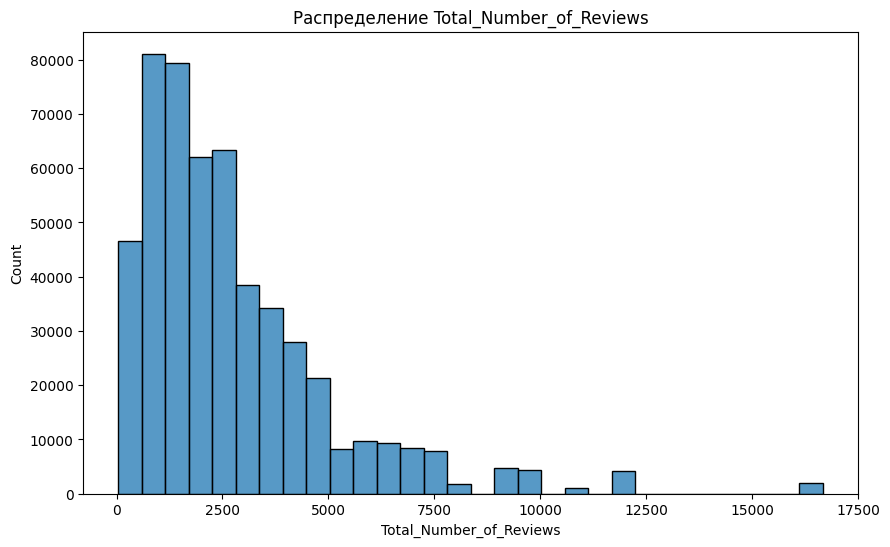

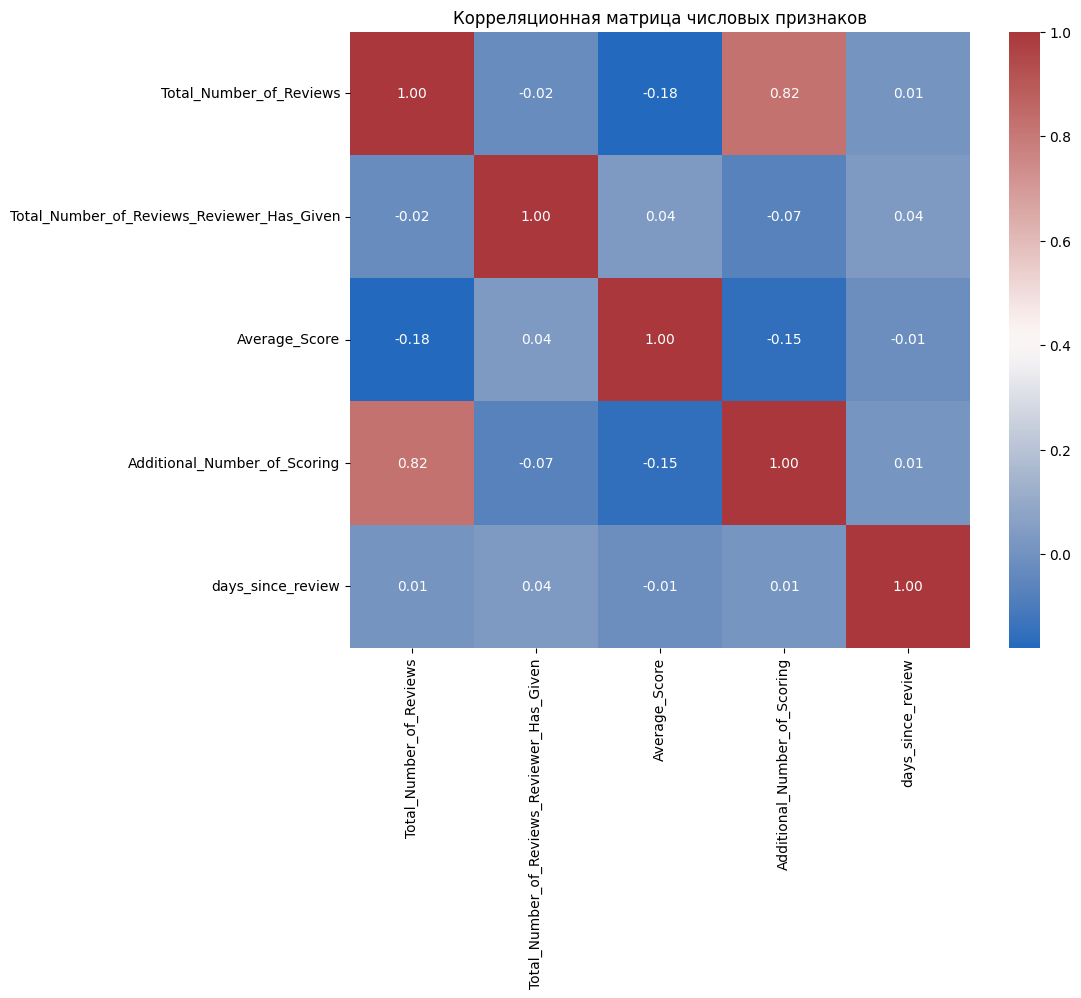

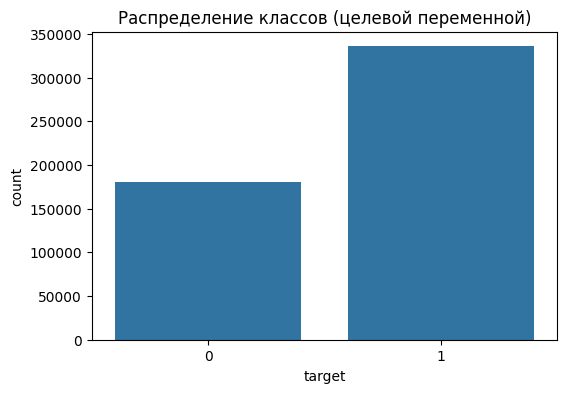

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
display(df[numeric_cols].describe())

plt.figure(figsize=(10,6))
sns.histplot(df[numeric_cols[0]] if len(numeric_cols)>0 else pd.Series(), bins=30)
plt.title(f"Распределение {numeric_cols[0]}")
plt.show()

if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="vlag")
    plt.title("Корреляционная матрица числовых признаков")
    plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Распределение классов (целевой переменной)")
plt.show()

In [14]:
missing_summary = df.isna().sum()
print("Количество пропусков по каждому признаку:")
display(missing_summary[missing_summary > 0] if (missing_summary > 0).any() else "Пропусков нет.")

Количество пропусков по каждому признаку:


'Пропусков нет.'

In [15]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, col, min_freq=0.01):
        self.col = col
        self.min_freq = min_freq
        self.frequent_labels_ = None
    def fit(self, X, y=None):
        s = X[self.col].fillna("UNKNOWN")
        freqs = s.value_counts(normalize=True)
        self.frequent_labels_ = set(freqs[freqs >= self.min_freq].index.tolist())
        return self
    def transform(self, X):
        s = X[self.col].fillna("UNKNOWN").astype(str)
        return s.apply(lambda v: v if v in self.frequent_labels_ else "OTHER").to_frame()

grouper = RareCategoryGrouper(col="Reviewer_Nationality", min_freq=0.005)
grouper.fit(X_train)
X_train_cat = grouper.transform(X_train)
X_test_cat = grouper.transform(X_test)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.fit(X_train_cat)
X_train_cat_ohe = ohe.transform(X_train_cat)
X_test_cat_ohe = ohe.transform(X_test_cat)

print("Размер категориальных признаков после One-Hot кодирования:")
print("Обучение:", X_train_cat_ohe.shape, "Тест:", X_test_cat_ohe.shape)

Размер категориальных признаков после One-Hot кодирования:
Обучение: (412590, 30) Тест: (103148, 30)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
if len(numeric_cols) > 0:
    scaler.fit(X_train[numeric_cols].fillna(0))
    X_train_num = scaler.transform(X_train[numeric_cols].fillna(0))
    X_test_num = scaler.transform(X_test[numeric_cols].fillna(0))
else:
    import numpy as _np
    X_train_num = _np.zeros((len(X_train),0))
    X_test_num = _np.zeros((len(X_test),0))

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words="english")
tfidf.fit(X_train["Combined_Review"].fillna(""))
X_train_tfidf = tfidf.transform(X_train["Combined_Review"].fillna(""))
X_test_tfidf = tfidf.transform(X_test["Combined_Review"].fillna(""))

svd = TruncatedSVD(n_components=100, random_state=42)
svd.fit(X_train_tfidf)
X_train_text = svd.transform(X_train_tfidf)
X_test_text = svd.transform(X_test_tfidf)
X_train_text.shape, X_test_text.shape

((412590, 100), (103148, 100))

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
if len(numeric_cols) > 0:
    scaler.fit(X_train[numeric_cols].fillna(0))
    X_train_num = scaler.transform(X_train[numeric_cols].fillna(0))
    X_test_num = scaler.transform(X_test[numeric_cols].fillna(0))
else:
    import numpy as _np
    X_train_num = _np.zeros((len(X_train),0))
    X_test_num = _np.zeros((len(X_test),0))

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words="english")
tfidf.fit(X_train["Combined_Review"].fillna(""))
X_train_tfidf = tfidf.transform(X_train["Combined_Review"].fillna(""))
X_test_tfidf = tfidf.transform(X_test["Combined_Review"].fillna(""))

svd = TruncatedSVD(n_components=100, random_state=42)
svd.fit(X_train_tfidf)
X_train_text = svd.transform(X_train_tfidf)
X_test_text = svd.transform(X_test_tfidf)

print("Размер текстовых признаков после SVD:", X_train_text.shape)
print("Размер числовых признаков:", X_train_num.shape)

Размер текстовых признаков после SVD: (412590, 100)
Размер числовых признаков: (412590, 5)


In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

subset_idx = np.random.choice(len(X_train_final), size=min(5000, len(X_train_final)), replace=False)
X_sub = X_train_final[subset_idx]
y_sub = y_train.iloc[subset_idx]

best_acc = 0
best_params = None
for k in [3, 5, 7]:
    for w in ["uniform", "distance"]:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w, n_jobs=-1)
        knn.fit(X_sub, y_sub)
        acc = accuracy_score(y_sub, knn.predict(X_sub))
        print(f"k={k}, weights={w} -> accuracy={acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = (k, w)

print("\nЛучшие параметры:", best_params)
best_knn = KNeighborsClassifier(n_neighbors=best_params[0], weights=best_params[1], n_jobs=-1)
best_knn.fit(X_train_final, y_train)

k=3, weights=uniform -> accuracy=0.8030
k=3, weights=distance -> accuracy=1.0000
k=5, weights=uniform -> accuracy=0.7624
k=5, weights=distance -> accuracy=1.0000
k=7, weights=uniform -> accuracy=0.7394
k=7, weights=distance -> accuracy=1.0000

Лучшие параметры: (3, 'distance')


,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


Train accuracy: 1.0
Test accuracy: 0.652

Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       645

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Test classification report:
              precision    recall  f1-score   support

           0       0.51      0.57      0.53       176
           1       0.75      0.70      0.72       324

    accuracy                           0.65       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.66      0.65      0.66       500



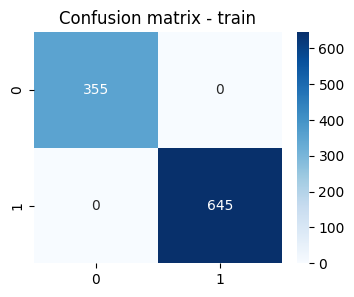

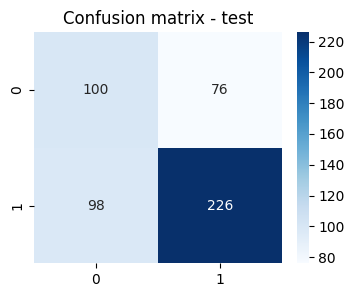

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_idx = np.random.choice(len(X_train_final), size=min(1000, len(X_train_final)), replace=False)
test_idx = np.random.choice(len(X_test_final), size=min(500, len(X_test_final)), replace=False)

X_train_sample = X_train_final[train_idx]
y_train_sample = y_train.iloc[train_idx]
X_test_sample = X_test_final[test_idx]
y_test_sample = y_test.iloc[test_idx]

y_train_pred = best_knn.predict(X_train_sample)
y_test_pred = best_knn.predict(X_test_sample)

train_acc = accuracy_score(y_train_sample, y_train_pred)
test_acc = accuracy_score(y_test_sample, y_test_pred)
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("\nTrain classification report:")
print(classification_report(y_train_sample, y_train_pred))
print("\nTest classification report:")
print(classification_report(y_test_sample, y_test_pred))

cm_train = confusion_matrix(y_train_sample, y_train_pred)
cm_test = confusion_matrix(y_test_sample, y_test_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - train")
plt.show()

plt.figure(figsize=(4,3))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - test")
plt.show()

In [ ]:
# =============================
# 12. Общие выводы
# =============================
# - Модель KNN показывает работоспособность на объединённых признаках: текстовые, числовые и категориальные.
# - Точность на обучающей и тестовой выборках (на подвыборках) даёт ориентир качества модели.
# - TF-IDF + SVD эффективно сокращает текстовые признаки, а StandardScaler нормализует числовые.
# - Категориальные признаки были сгруппированы по частоте и закодированы One-Hot.
# - Для больших данных KNN сильно нагружает процессор, поэтому рекомендуется использовать подвыборки
#   или альтернативные классификаторы (LogisticRegression, RandomForest, LightGBM) для полной выборки.
# - Выводы: модель работает, признаки информативны, можно улучшить качество за счёт более сложной модели
#   или более детальной обработки текста и баланса классов.